#### Classifying news headlines

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [3]:
!wget --no-check-certificate \
    https://storage.googleapis.com/wdd-2-node.appspot.com/x1.json \
    -o /tmp/headlines.json

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [8]:
## read json data
import pandas as pd

data = pd.read_json("x1.json")
data.head()

,is_sarcastic,headline,article_link
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...
4,1,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...


In [9]:
## store headlines and labels in respective lists
headlines = list(data['headline'])
labels = list(data['is_sarcastic'])

#### Set parameters

In [11]:
vocab_size = 10000
max_length = 120
embedding_dim = 16
trunc_type = 'post'
padding_type = 'post'
oov_tok = "<OOV>"
training_size = 20000

#### Splitting the training and testing set

In [12]:
training_sentences = headlines[0:training_size]
testing_sentences = headlines[training_size:]

#labels
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

#### Preprocess sentences

In [14]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_seqs = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_seqs, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_seqs = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_seqs, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [15]:
# Convert to lists to numpy array

training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

#### Define the neural network model with following layers

1. Embedding
2. Global Average Pooling(1D)
3. Dense layer with 24 nodes
4. Output dense layer with sigmoid activation

In [18]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 120, 16)           160000    
                                                                 
 global_average_pooling1d (G  (None, 16)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 24)                408       
                                                                 
 dense_1 (Dense)             (None, 1)                 25        
                                                                 
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________


In [19]:
# Train the model
num_epochs = 30
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels))

Epoch 1/30
625/625 [==============================] - 3s 3ms/step - loss: 0.6620 - accuracy: 0.5982 - val_loss: 0.5544 - val_accuracy: 0.8055
Epoch 2/30
625/625 [==============================] - 2s 3ms/step - loss: 0.4244 - accuracy: 0.8320 - val_loss: 0.3907 - val_accuracy: 0.8240
Epoch 3/30
625/625 [==============================] - 2s 3ms/step - loss: 0.3184 - accuracy: 0.8702 - val_loss: 0.3536 - val_accuracy: 0.8433
Epoch 4/30
625/625 [==============================] - 2s 3ms/step - loss: 0.2671 - accuracy: 0.8947 - val_loss: 0.3333 - val_accuracy: 0.8562
Epoch 5/30
625/625 [==============================] - 2s 3ms/step - loss: 0.2324 - accuracy: 0.9098 - val_loss: 0.3322 - val_accuracy: 0.8556
Epoch 6/30
625/625 [==============================] - 3s 4ms/step - loss: 0.2053 - accuracy: 0.9225 - val_loss: 0.3561 - val_accuracy: 0.8478
Epoch 7/30
625/625 [==============================] - 2s 4ms/step - loss: 0.1827 - accuracy: 0.9323 - val_loss: 0.3512 - val_accuracy: 0.8507
Epoch 

#### Visualize the train & validation accuracy and loss

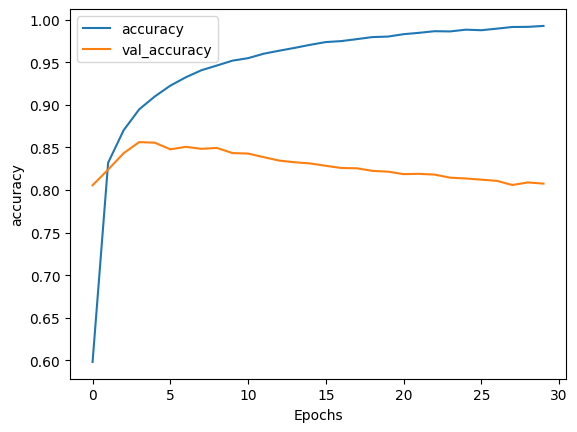

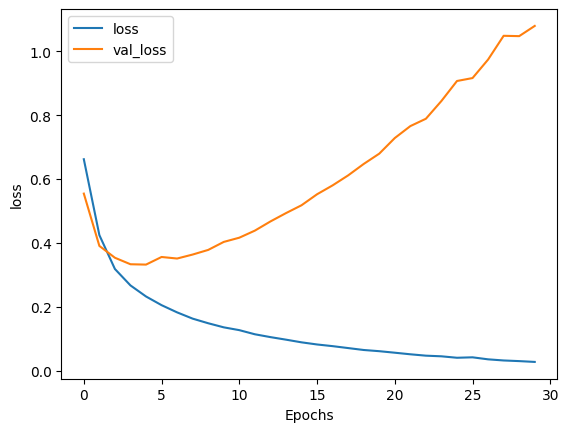

In [24]:
import matplotlib.pyplot as plt

#plot scores
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.legend([string, 'val_'+string])
    plt.xlabel('Epochs')
    plt.ylabel(string)
    plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, "loss")

#### Clasify a new sentence based on this model

In [26]:
sentence = ["The baby boy fears spiders in the garden might be real", "game of thrones season finale showing this sunday night"]

## prepare the sequences of the sentences in question
sequences = tokenizer.texts_to_sequences(sentence)
padded_seqs = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

print(model.predict(padded_seqs))

1/1 [==============================] - 0s 96ms/step
[[4.924646e-07]
 [3.214160e-08]]


In [28]:
sentence = ["Police Begin Campaign to Run Down Jaywalkers"]
## prepare the sequences of the sentences in question
sequences = tokenizer.texts_to_sequences(sentence)
padded_seqs = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print(model.predict(padded_seqs))

1/1 [==============================] - 0s 29ms/step
[[0.99557257]]
